In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv("rawdata/DIABETES.csv")

df_raw.head(5)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [41]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop(["Y", "CHOLESTEROL"], axis = 1, inplace = False)

In [42]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}\n".format(df_test_y.shape))

knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(knn_uncustomized.score(df_test_x, df_test_y)))

Train data X size	: (309, 9)
Train data Y size	: (309,)
Test data X size	: (133, 9)
Test data Y size	: (133,)

Score on training set:	0.445
Score on test set:	0.250


In [43]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [44]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,16)]

for v_n_neighbors in para_n_neighbors:
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors)
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_knn = pd.DataFrame()
df_score_knn["n_neighbors"] = para_n_neighbors
df_score_knn["TrainScore"] = train_score
df_score_knn["TestScore"] = test_score

df_score_knn.round(3)

,n_neighbors,TrainScore,TestScore
0,1,1.000,-0.151
1,2,0.699,0.069
2,3,0.561,0.141
3,4,0.468,0.206
4,5,0.445,0.250
5,6,0.429,0.291
6,7,0.433,0.295
7,8,0.430,0.287
8,9,0.412,0.322
9,10,0.405,0.342


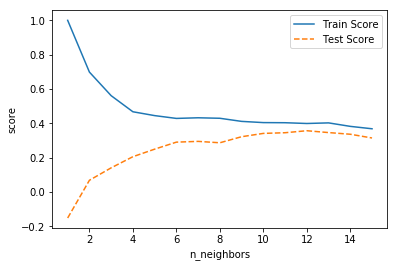

In [45]:
plt.plot(para_n_neighbors, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_neighbors, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()

In [46]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,11)] * 2

para_weights = (["uniform"] * 10) + (["distance"] * 10)

for (v_n_neighbors, v_weight) in zip(para_n_neighbors, para_weights):
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors, weights = v_weight)
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_weight = pd.DataFrame()
df_score_weight["Neighbors"] = para_n_neighbors
df_score_weight["Weights"] = para_weights
df_score_weight["TrainScore"] = train_score
df_score_weight["TestScore"] = test_score

df_score_weight.round(3)

,Neighbors,Weights,TrainScore,TestScore
0,1,uniform,1.000,-0.151
1,2,uniform,0.699,0.069
2,3,uniform,0.561,0.141
3,4,uniform,0.468,0.206
4,5,uniform,0.445,0.250
5,6,uniform,0.429,0.291
6,7,uniform,0.433,0.295
7,8,uniform,0.430,0.287
8,9,uniform,0.412,0.322
9,10,uniform,0.405,0.342


In [47]:
df_score_weight_pivot = df_score_weight.pivot(index="Neighbors", columns="Weights", values = ["TrainScore", "TestScore"])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000 -0.151080 -0.151080
2                1.0  0.698673  0.084931  0.068652
3                1.0  0.561325  0.160445  0.141095
4                1.0  0.467608  0.216471  0.205923
5                1.0  0.445241  0.254122  0.249813

In [48]:
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 + "_" + level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,-0.151080,-0.151080
2,1.0,0.698673,0.084931,0.068652
3,1.0,0.561325,0.160445,0.141095
4,1.0,0.467608,0.216471,0.205923
5,1.0,0.445241,0.254122,0.249813


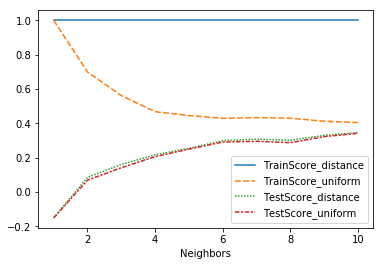

In [49]:
sns.lineplot(data = df_score_weight_pivot)

In [50]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,11)] * 3

para_weights = (["uniform"] * 10) + (["distance"] * 10)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_metric = pd.DataFrame()
df_score_metric["Neighbors"] = para_n_neighbors
df_score_metric["Metric"] = para_metric
df_score_metric["TrainScore"] = train_score
df_score_metric["TestScore"] = test_score

df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,-0.151
1,2,minkowski,0.699,0.069
2,3,minkowski,0.561,0.141
3,4,minkowski,0.468,0.206
4,5,minkowski,0.445,0.250
5,6,minkowski,0.429,0.291
6,7,minkowski,0.433,0.295
7,8,minkowski,0.430,0.287
8,9,minkowski,0.412,0.322
9,10,minkowski,0.405,0.342


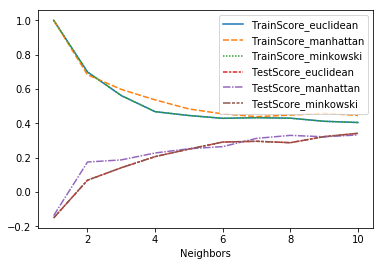

In [51]:
df_score_metric_pivot = df_score_metric.pivot(index="Neighbors", columns="Metric", values = ["TrainScore", "TestScore"])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1
df_score_metric_pivot.head()

sns.lineplot(data = df_score_metric_pivot)

In [52]:
knn_final = KNeighborsRegressor(n_neighbors = 5, metric = "minkowski", weights = "uniform")
knn_final.fit(df_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % knn_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % knn_final.score(df_test_x, df_test_y))


Score on trainig set	: 0.445
Score on test set	: 0.250


In [53]:
estimator = KNeighborsRegressor()
param_grid = {"n_neighbors": para_n_neighbors, "weights":para_weights, "metric": para_metric}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator vmodel: \n{}".format(grid_dt.best_estimator_))
print("Best Parameter: \n{}".format(grid_dt.best_params_))
print("Best score: {}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator vmodel: 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')
Best Parameter: 
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
Best score: 0.301


In [54]:
knn_final = KNeighborsRegressor(n_neighbors = 9, metric = "manhattan", weights = "uniform")
knn_final.fit(df_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % knn_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % knn_final.score(df_test_x, df_test_y))


Score on trainig set	: 0.458
Score on test set	: 0.321


In [55]:
knn_final = KNeighborsRegressor(n_neighbors = 8, metric = "manhattan", weights = "uniform")
knn_final.fit(df_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % knn_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % knn_final.score(df_test_x, df_test_y))


Score on trainig set	: 0.448
Score on test set	: 0.330
